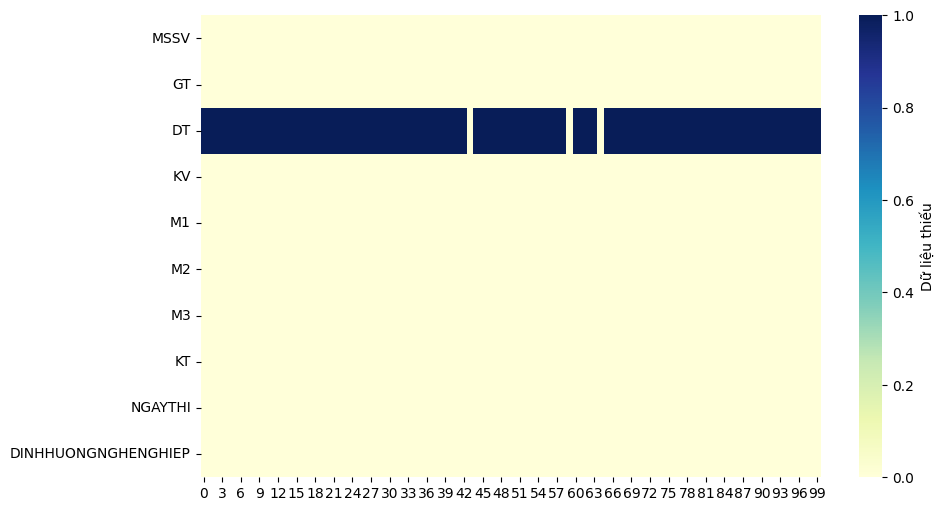

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()


In [2]:
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)
df["M1"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_13108\101097430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13108\101097430.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13108\10109

0     3.25
1     6.00
2     5.00
3     4.25
4     4.25
      ... 
95    5.25
96    5.25
97    7.00
98    5.00
99    5.25
Name: M1, Length: 100, dtype: float64

In [3]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP,TBM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667


In [4]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP,TBM,XL
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL


In [5]:
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP,TBM,XL,NHOM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3


In [13]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP,NHOM,TBM,XL,PLUS
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No,G1,3.666667,FAIL,0.0
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes,G3,4.500000,FAIL,0.0
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No,G3,5.250000,FAIR,0.0
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No,G3,4.583333,FAIL,0.0
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No,G1,4.583333,FAIL,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes,G3,4.333333,FAIL,0.0
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No,G3,4.583333,FAIL,0.0
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,G3,6.333333,FAIR,0.0
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No,G3,4.666667,FAIL,0.0


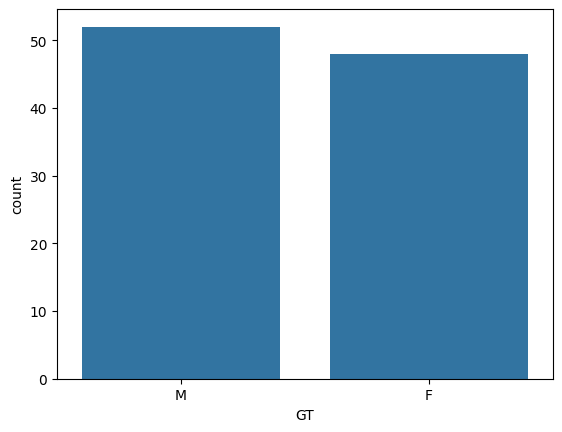

In [4]:
sns.countplot(x='GT', data=df, order=['M','F'])
plt.show()

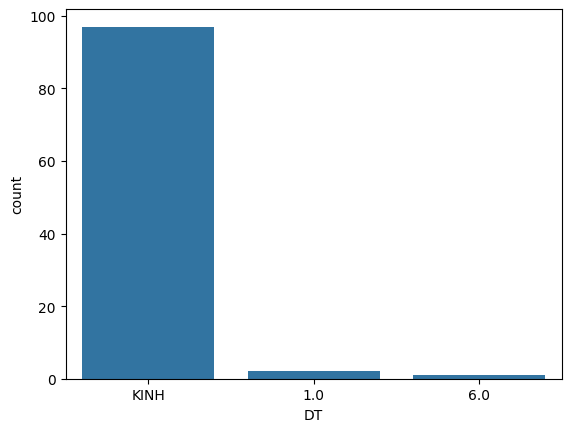

In [17]:
sns.countplot(x='DT', data=df)
plt.show()

In [13]:
iqr = df['M1'].quantile(0.75) - df['M1'].quantile(0.25)
iqr

np.float64(2.25)

In [14]:
deltaD = np.mean(np.abs(df['M1'] - np.mean(df['M1'])))
deltaD

np.float64(1.1600000000000001)

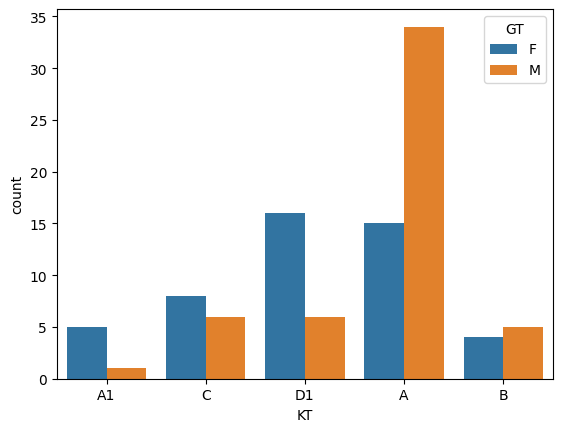

In [15]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

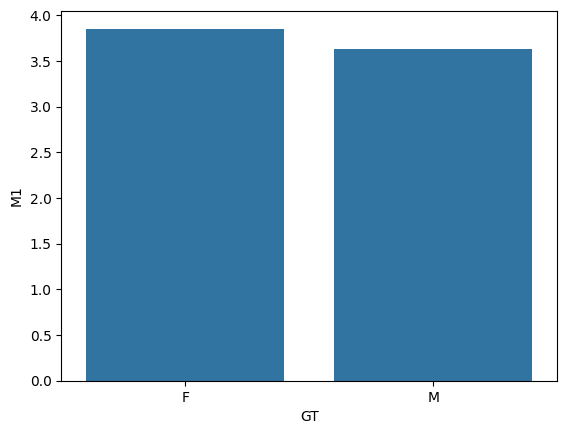

In [16]:
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()

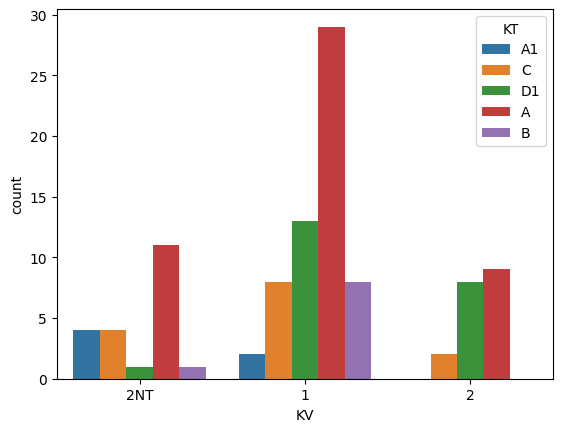

In [17]:
sns.countplot(x='KV', hue='KT',data=df)
plt.show()

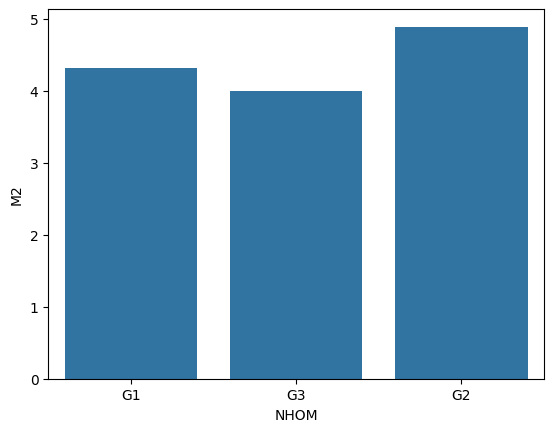

In [15]:
sns.barplot(x='NHOM', y='M2', data=df, errorbar=None)
plt.show()

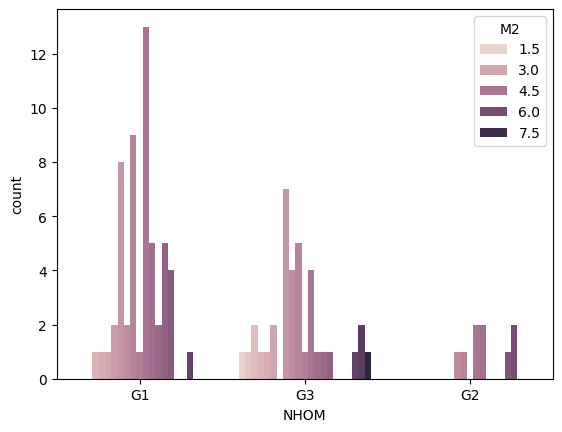

In [18]:
sns.countplot(x='NHOM', hue='M2', data=df)
plt.show()

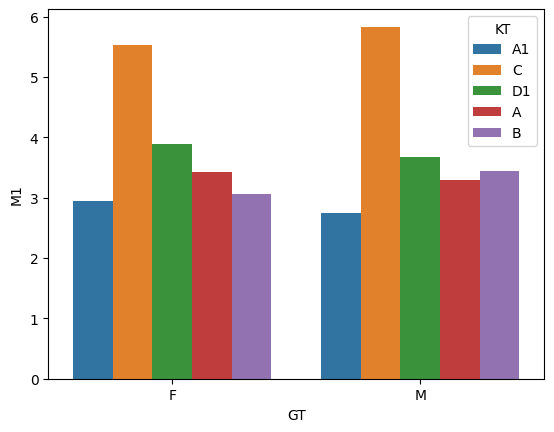

In [ ]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

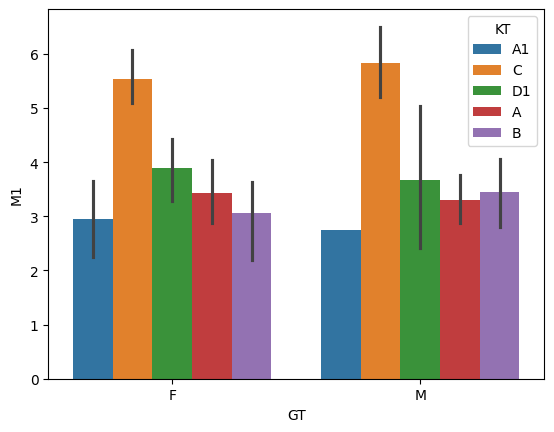

In [ ]:
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

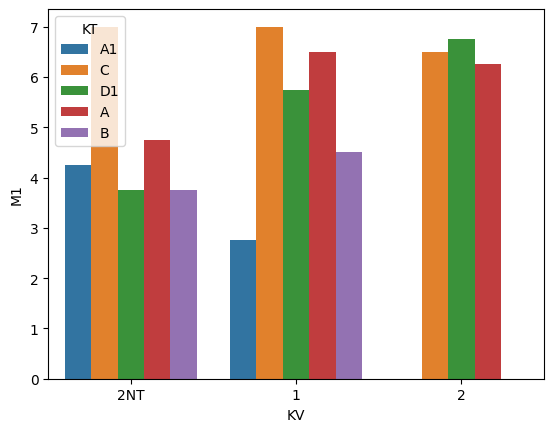

In [ ]:
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

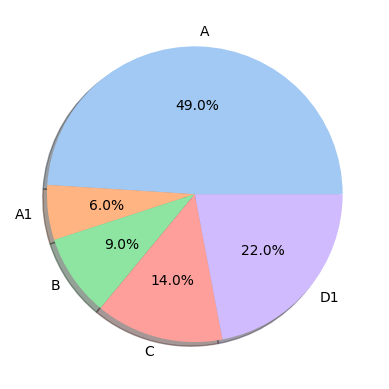

In [ ]:
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

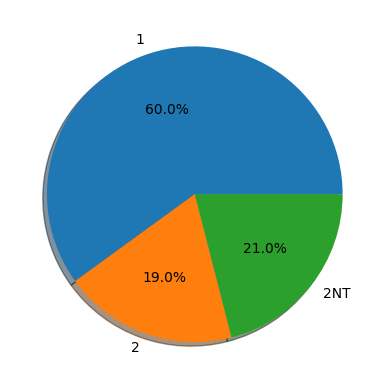

In [ ]:
gb = df.groupby(['KV'])['KV'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, 
        autopct='%1.1f%%', shadow=True)

plt.show()

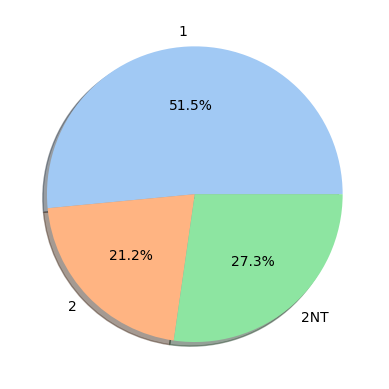

In [ ]:
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

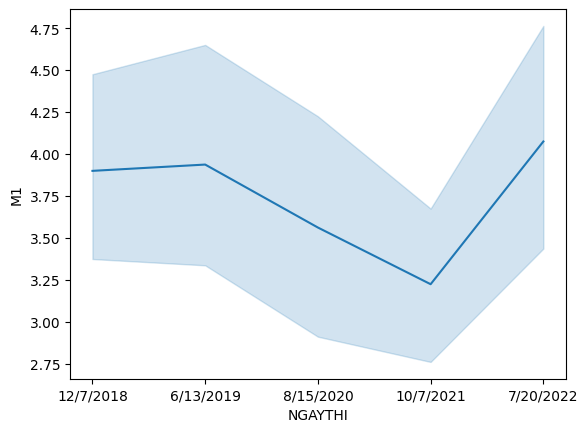

In [20]:
sns.lineplot(x='NGAYTHI', y='M1', data=df)
plt.show()

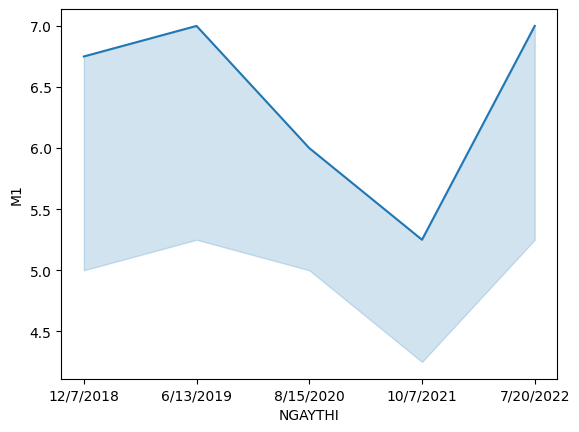

In [ ]:
sns.lineplot(x='NGAYTHI', y='M1', data=df, estimator=np.max)
plt.show()

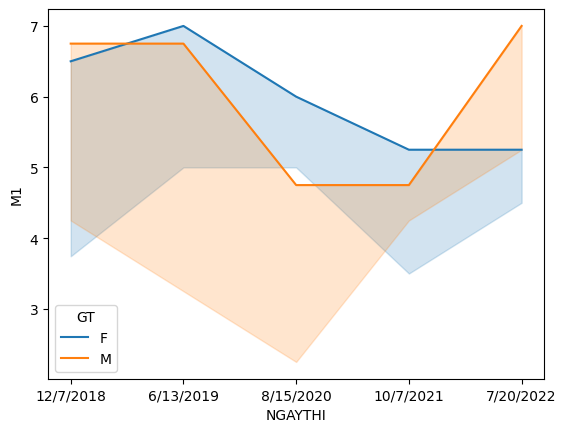

In [ ]:
sns.lineplot(x='NGAYTHI', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()

In [19]:
#khoan range cho M1 va M2
df[['M1','M2']].max() - df[['M1','M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [20]:
# do lon IQR
df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

np.float64(2.25)

In [21]:
df['M2'].quantile(0.75) - df['M2'].quantile(0.25)

np.float64(1.25)

In [22]:
#do lech TB cho M1 va M2
np.mean(np.abs(df['M1'] - np.mean(df['M1'])))

np.float64(1.1600000000000001)

In [23]:
np.mean(np.abs(df['M2'] - np.mean(df['M2'])))

np.float64(0.8001999999999998)

In [24]:
df['M1'].var()
#phuong sai

np.float64(2.0289393939393943)

In [25]:
df['M2'].var()

np.float64(1.1237121212121213)

In [26]:
print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())
#so sanh 

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [27]:
df[['M1','M2']].std()/df[['M1','M2']].mean()
#CV

M1    0.380858
M2    0.249131
dtype: float64

In [28]:
# Su dung CV de SS muc do phan tan cua M1, M2, M3
df[['M1','M2','M3']].std()/df[['M1','M2','M3']].mean()

M1    0.380858
M2    0.249131
M3    0.213566
dtype: float64

In [29]:
# cung cap toan bo thong tin
df['M1'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [30]:
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [35]:
#Tinh nhanh CV
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)

[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

In [39]:
df.groupby('GT')['M1'].describe()


,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [41]:
df.groupby('GT')['M1'].std()/df.groupby('GT')['M1'].mean()


GT
F    0.349905
M    0.411677
Name: M1, dtype: float64

In [46]:
df.groupby('GT')[['M2','M1','M3']].std()/df.groupby('GT')[['M2','M1','M3']].mean()

,M2,M1,M3
GT,,,
F,0.252518,0.349905,0.192854
M,0.240146,0.411677,0.233215


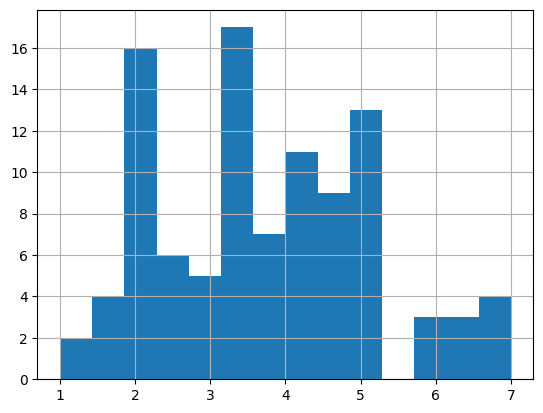

In [22]:
df['M1'].hist(bins=14)
plt.show()

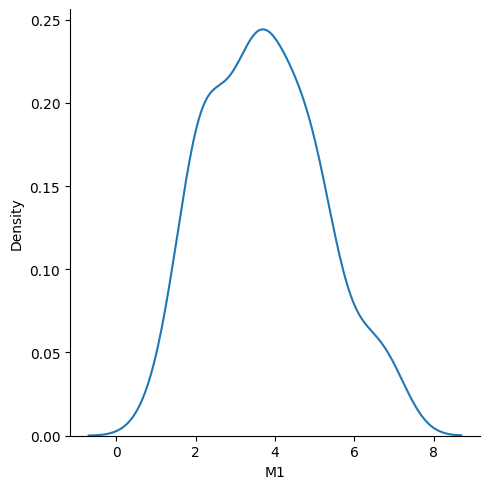

In [48]:
sns.displot(df, x='M1', kind='kde')
plt.show()

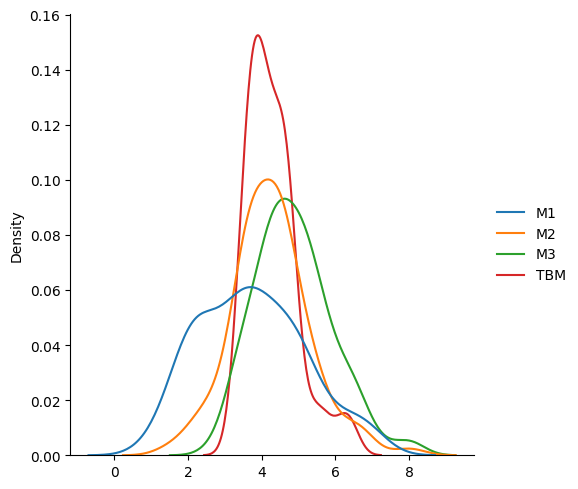

In [24]:
sns.displot(data = df[['M1','M2','M3','TBM']], kind='kde')
plt.show()

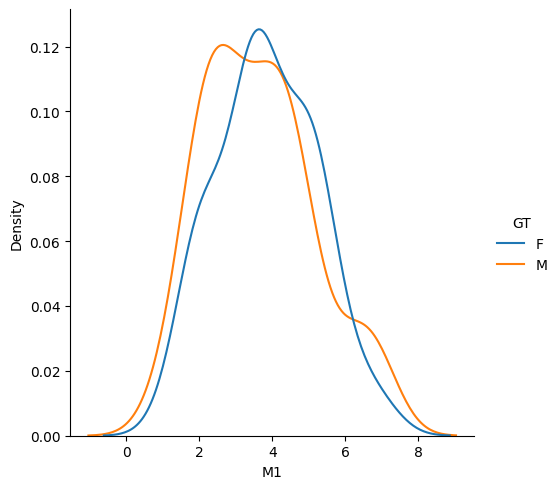

In [52]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()

In [53]:
#do xien, do lon||, 
#sk > 0: lech phai(mean>median)
df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [55]:
#neu excess>0:thin
#          <0:fat
#          =0:fit
df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

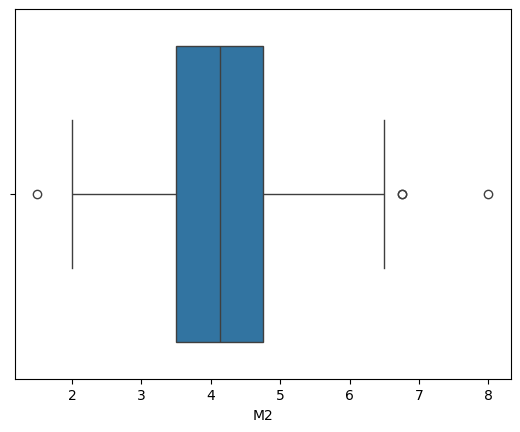

In [58]:
#boxplot: bieu do mo ta du lieu thuong dung cho 1 bien dinh luong
#can trai = Q1-1.5*IQR, phai = Q3+1.5*IQR
#outline: 1.5*IQR
sns.boxplot(data=df['M2'], orient="h")
plt.show()

In [59]:
df['M2'].quantile(0.75) - df['M2'].quantile(0.25)

np.float64(1.25)

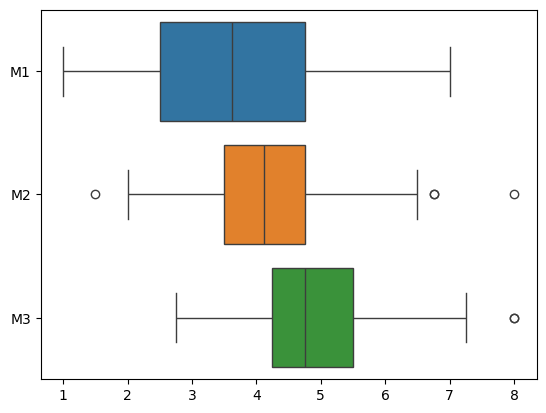

In [60]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()


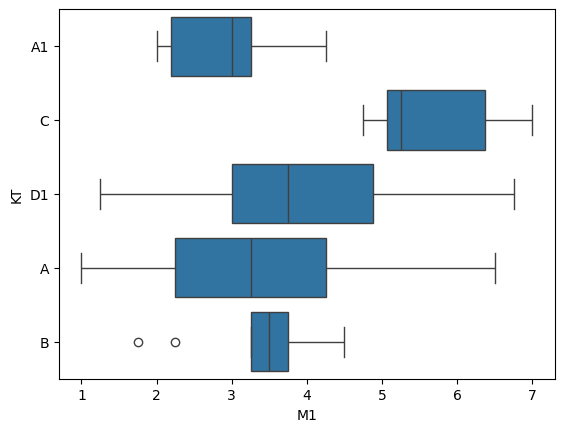

In [61]:
sns.boxplot(x='M1', y='KT',data=df, orient='h')
plt.show()

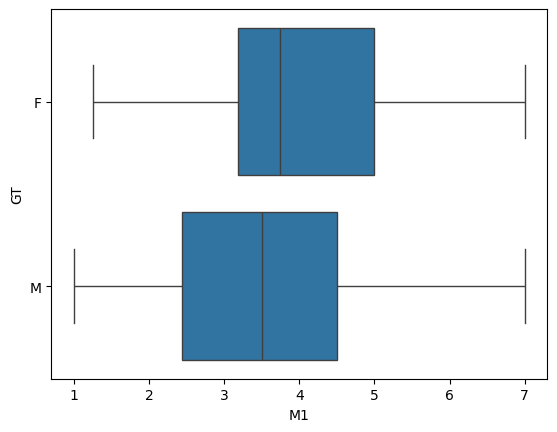

In [62]:
sns.boxplot(x='M1', y='GT',data=df, orient='h')
plt.show()
#khong co GT nao bat thuong
#GT anh huong toi viec du bao diem M1

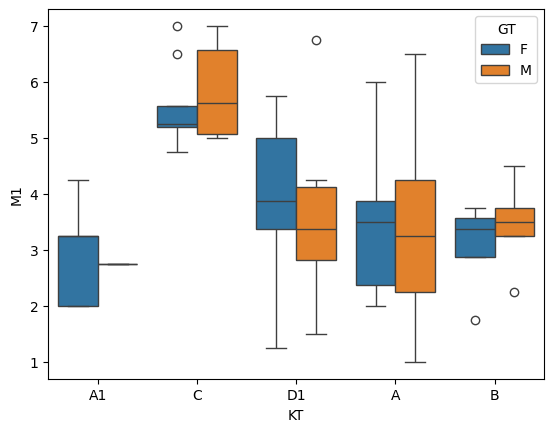

In [63]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()


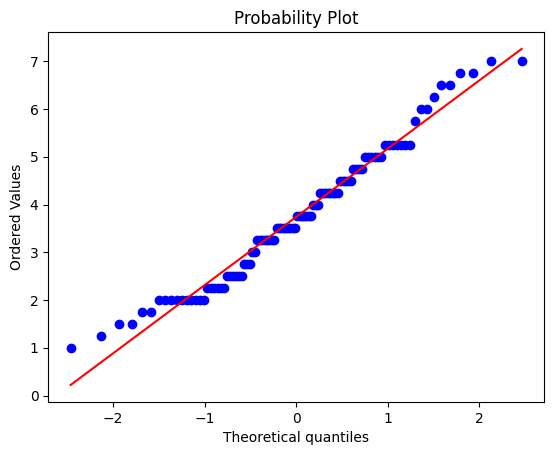

In [64]:
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()
#diem mau xanh nam tat ca tren duong mau do la phan khoi chuan

In [65]:

df[['M1','M2']].cov()


,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [68]:
#do tuong quan tuyen tinh
df[['M1','M2']].corr()


,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


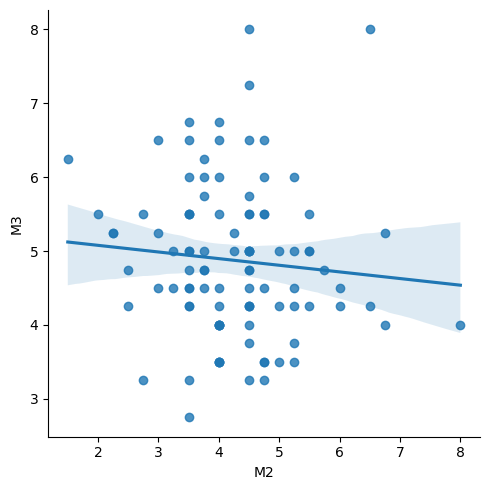

In [72]:
sns.lmplot(data=df, x='M2', y='M3', fit_reg=True)
plt.show()

In [73]:
df[['M1','M2','M3']].corr()

,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


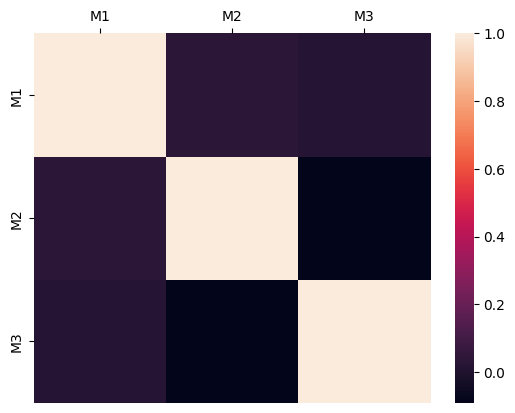

In [74]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

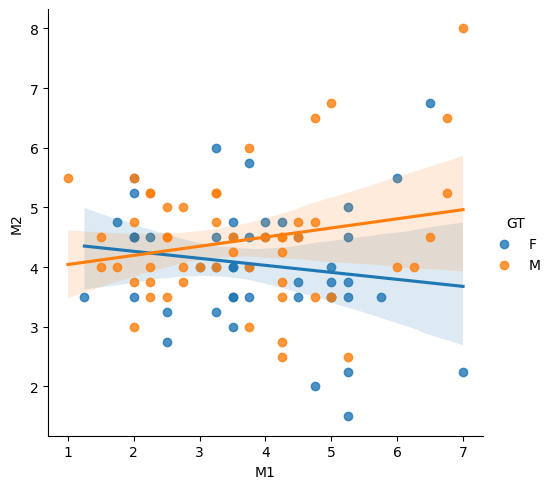

In [77]:
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()


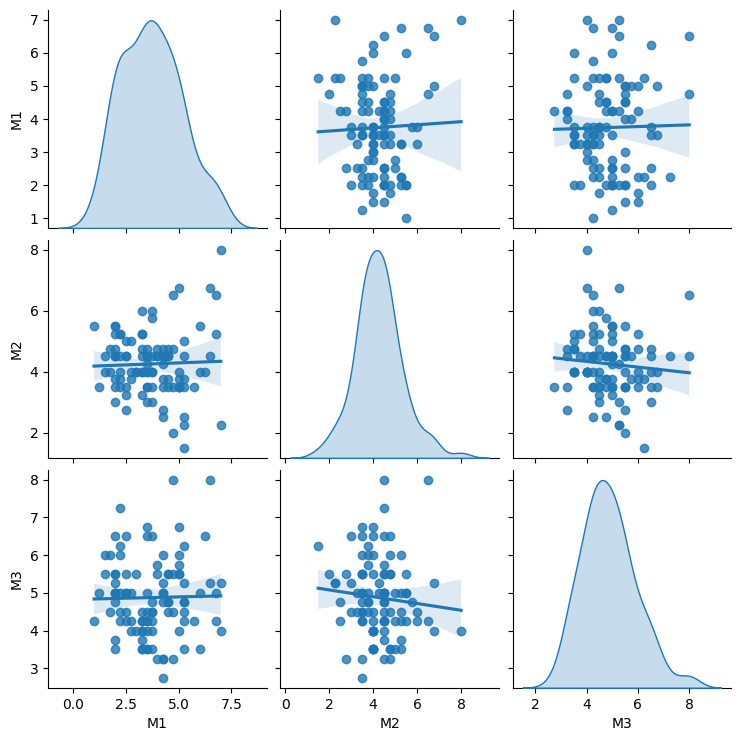

In [80]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()